# DATA MINING LAB-01

## DATA CLEANING AND PREPROCESSING

In [1]:
import pandas as pd
df = pd.DataFrame({
    "Name":['Bhuvan','Vivek','Alok','Vinay','sham'],
    "Regno": [101, 102, 103, 104, 105],
    "DOB": ['2004-07-30', '2004-05-23', '2000-06-15', '1999-11-30', '2003-03-24'],
    "Mark": [90, 29, 68, None, 88],
    "Grade": ['A+', 'A', 'B', 'B+', None],
    "Gender": ['M', 'M', 'M', None, 'M']
})

df

,Name,Regno,DOB,Mark,Grade,Gender
0,Bhuvan,101,2004-07-30,90.0,A+,M
1,Vivek,102,2004-05-23,29.0,A,M
2,Alok,103,2000-06-15,68.0,B,M
3,Vinay,104,1999-11-30,NaN,B+,None
4,sham,105,2003-03-24,88.0,None,M


In [2]:
df.head()

,Name,Regno,DOB,Mark,Grade,Gender
0,Bhuvan,101,2004-07-30,90.0,A+,M
1,Vivek,102,2004-05-23,29.0,A,M
2,Alok,103,2000-06-15,68.0,B,M
3,Vinay,104,1999-11-30,NaN,B+,None
4,sham,105,2003-03-24,88.0,None,M


In [3]:
filterd=df.filter(["Name","Regno"])
filterd

,Name,Regno
0,Bhuvan,101
1,Vivek,102
2,Alok,103
3,Vinay,104
4,sham,105


In [4]:
df=df.drop_duplicates()
df

,Name,Regno,DOB,Mark,Grade,Gender
0,Bhuvan,101,2004-07-30,90.0,A+,M
1,Vivek,102,2004-05-23,29.0,A,M
2,Alok,103,2000-06-15,68.0,B,M
3,Vinay,104,1999-11-30,NaN,B+,None
4,sham,105,2003-03-24,88.0,None,M


In [5]:
missing=df.isnull().sum()
missing

Name      0
Regno     0
DOB       0
Mark      1
Grade     1
Gender    1
dtype: int64

In [6]:
df=df.dropna()
df

,Name,Regno,DOB,Mark,Grade,Gender
0,Bhuvan,101,2004-07-30,90.0,A+,M
1,Vivek,102,2004-05-23,29.0,A,M
2,Alok,103,2000-06-15,68.0,B,M


In [7]:
df=df.rename(columns={"Regno":"Roll_No"})
df

,Name,Roll_No,DOB,Mark,Grade,Gender
0,Bhuvan,101,2004-07-30,90.0,A+,M
1,Vivek,102,2004-05-23,29.0,A,M
2,Alok,103,2000-06-15,68.0,B,M


In [8]:
df.describe()

,Roll_No,Mark
count,3.0,3.000000
mean,102.0,62.333333
std,1.0,30.892286
min,101.0,29.000000
25%,101.5,48.500000
50%,102.0,68.000000
75%,102.5,79.000000
max,103.0,90.000000


In [9]:
min_marks=df["Mark"].min()
min_marks

29.0

In [10]:
max_marks=df["Mark"].max()
max_marks

90.0

In [11]:
mean_mark=df["Mark"].mean()
mean_mark

62.333333333333336

In [12]:
std_mark=df["Mark"].std()
std_mark

30.89228598426043

In [13]:
median_mark=df["Mark"].median()
median_mark

68.0

In [14]:
mode_mark=df["Mark"].mode()
mode_mark

0    29.0
1    68.0
2    90.0
Name: Mark, dtype: float64

In [15]:
var_mark=df["Mark"].var()
var_mark

954.3333333333334

In [16]:
coeff=(std_mark/var_mark)*100
coeff

3.2370540675089514

In [17]:
quantile_mark=df["Mark"].quantile([.25,0.5,0.75])
quantile_mark

0.25    48.5
0.50    68.0
0.75    79.0
Name: Mark, dtype: float64

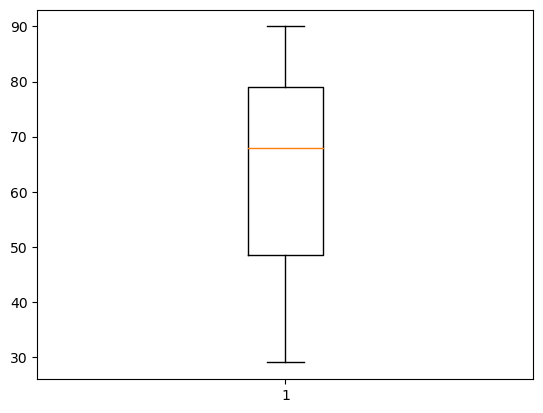

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df["Mark"])
plt.show()

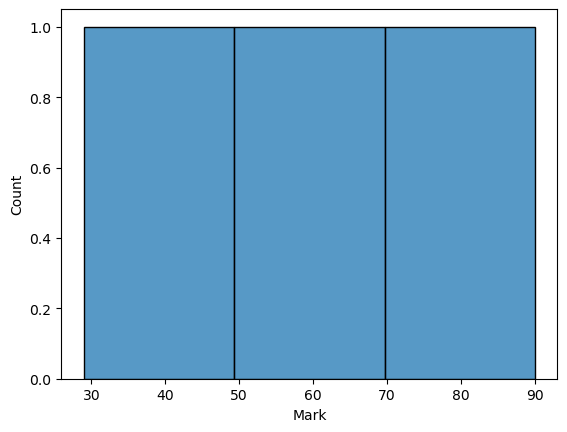

In [19]:
import seaborn as sns
sns.histplot(df["Mark"])
plt.show()

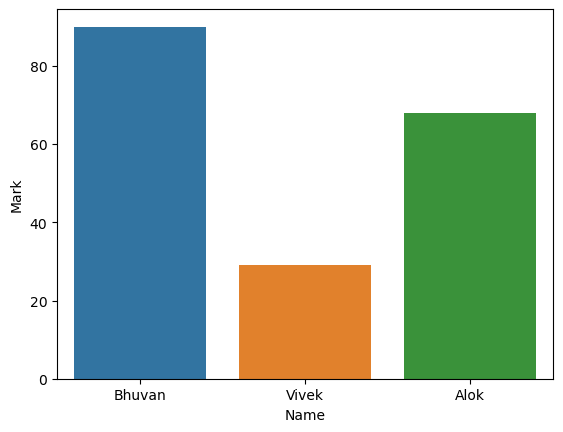

In [20]:
sns.barplot(x=df["Name"],y=df["Mark"])
plt.show()

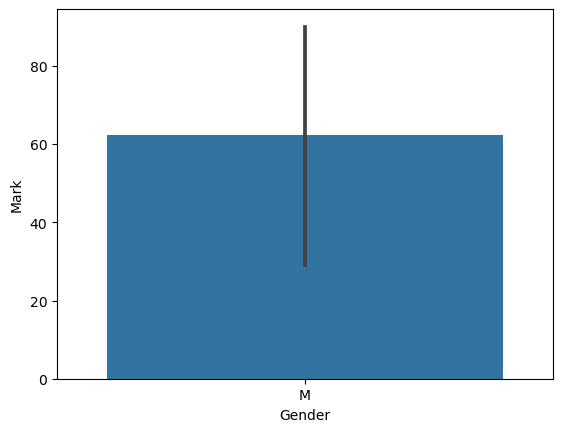

In [21]:
sns.barplot(x=df["Gender"],y=df["Mark"])
plt.show()

## NORMALIZATION

### 1. MIN-MAX NORMALIZATION

### FORMULA-- (X-X{min})/(X{max}-X{min})

In [22]:
df['Minmax_Norm'] = (df['Mark'] - min_marks) / (max_marks - min_marks)
df

,Name,Roll_No,DOB,Mark,Grade,Gender,Minmax_Norm
0,Bhuvan,101,2004-07-30,90.0,A+,M,1.000000
1,Vivek,102,2004-05-23,29.0,A,M,0.000000
2,Alok,103,2000-06-15,68.0,B,M,0.639344


### 2. Z-SCORE NORMALIZATION

### FORMULA--(X-mean )/std

In [23]:
df['Z_score'] = (df['Mark'] - mean_mark) / std_mark
df

,Name,Roll_No,DOB,Mark,Grade,Gender,Minmax_Norm,Z_score
0,Bhuvan,101,2004-07-30,90.0,A+,M,1.000000,0.895585
1,Vivek,102,2004-05-23,29.0,A,M,0.000000,-1.079018
2,Alok,103,2000-06-15,68.0,B,M,0.639344,0.183433


### 3.DECIMAL SCALING

### FORMULA--X/10^{j}

In [24]:
df['Decimal_scale'] = df['Mark'] / pow(10,2)
df

,Name,Roll_No,DOB,Mark,Grade,Gender,Minmax_Norm,Z_score,Decimal_scale
0,Bhuvan,101,2004-07-30,90.0,A+,M,1.000000,0.895585,0.90
1,Vivek,102,2004-05-23,29.0,A,M,0.000000,-1.079018,0.29
2,Alok,103,2000-06-15,68.0,B,M,0.639344,0.183433,0.68
